### Import libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

### Load the data

In [270]:
df = pd.read_csv('ECA_blended_custom/TG_STAID002759.txt', sep=",", skiprows=list(range(0,19)))
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52711,111448,20200426,124,0
52712,111448,20200427,151,0
52713,111448,20200428,170,0
52714,111448,20200429,120,0


### Reformat columns and set date as index

In [271]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [272]:
df['TG'] = df['TG'] / 10

In [273]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [274]:
df.set_index('DATE', inplace=True)

Take slice of dataframe to avoid missing values

In [275]:
# start dataframe from first day with values after WW2
df = df['1945-11-06':]

Plot temperature

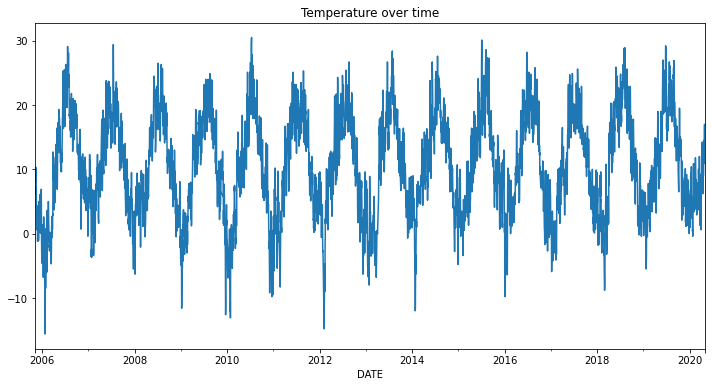

In [276]:
# to check for trends: test with linear regression and look for significance?
df['2005-11-06':].TG.plot(figsize=(12,6), title='Temperature over time')
plt.show()

In [277]:
df['difference'] = df['TG'].diff()
df.head()

<ipython-input-277-35911543a9fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = df['TG'].diff()


,SOUID,TG,Q_TG,difference
DATE,,,,
1945-11-06,127488,7.8,0,NaN
1945-11-07,127488,6.8,0,-1.0
1945-11-08,127488,6.4,0,-0.4
1945-11-09,127488,4.0,0,-2.4
1945-11-10,127488,4.6,0,0.6


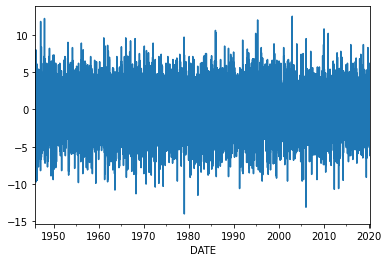

In [285]:
df['difference'].plot()

In [279]:
df['difference'].mean()

0.00021687987060726318

In [280]:
# How does second order differencing work?
df['2nddifference'] = df['difference'].diff()
df.head()

<ipython-input-280-fd311462d84a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2nddifference'] = df['difference'].diff()


,SOUID,TG,Q_TG,difference,2nddifference
DATE,,,,,
1945-11-06,127488,7.8,0,NaN,NaN
1945-11-07,127488,6.8,0,-1.0,NaN
1945-11-08,127488,6.4,0,-0.4,0.6
1945-11-09,127488,4.0,0,-2.4,-2.0
1945-11-10,127488,4.6,0,0.6,3.0


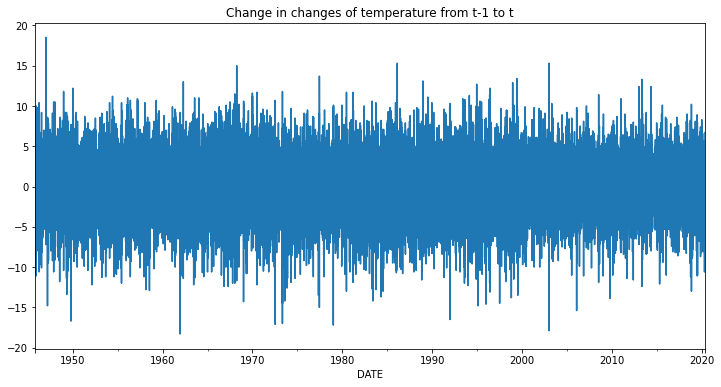

In [281]:
df['2nddifference'].plot(figsize=(12,6), title='Change in changes of temperature from t-1 to t')

In [282]:
df['2nddifference'].mean() # if close to 0 than trend probably linear

9.925375877660964e-05

In [283]:
df['day_of_year'] = df.index.dayofyear

<ipython-input-283-d1cb42a2beec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_year'] = df.index.dayofyear


In [287]:
# calculate the monthly mean difference of the log transformed passenger numbers
df.groupby('day_of_year')['difference'].mean()

day_of_year
1     -0.008000
2      0.422667
3     -0.116000
4     -0.413333
5      0.048000
         ...   
362    0.020000
363   -0.696000
364   -0.509333
365   -0.408000
366    0.594444
Name: difference, Length: 366, dtype: float64

In [288]:
# Transform takes in a pd.Series and returns an array of the same length
df['daily_mean'] = df.groupby('day_of_year')['difference'].transform('mean')
df.head()

<ipython-input-288-ddc8d1f63ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_mean'] = df.groupby('day_of_year')['difference'].transform('mean')


,SOUID,TG,Q_TG,difference,2nddifference,day_of_year,daily_mean
DATE,,,,,,,
1945-11-06,127488,7.8,0,NaN,NaN,310,-0.266216
1945-11-07,127488,6.8,0,-1.0,NaN,311,-0.256000
1945-11-08,127488,6.4,0,-0.4,0.6,312,-0.165333
1945-11-09,127488,4.0,0,-2.4,-2.0,313,-0.308000
1945-11-10,127488,4.6,0,0.6,3.0,314,-0.376000


In [289]:
# demean the series
df['deseasonalized'] = df['difference'] - df['daily_mean']

<ipython-input-289-b83160bd26d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deseasonalized'] = df['difference'] - df['daily_mean']


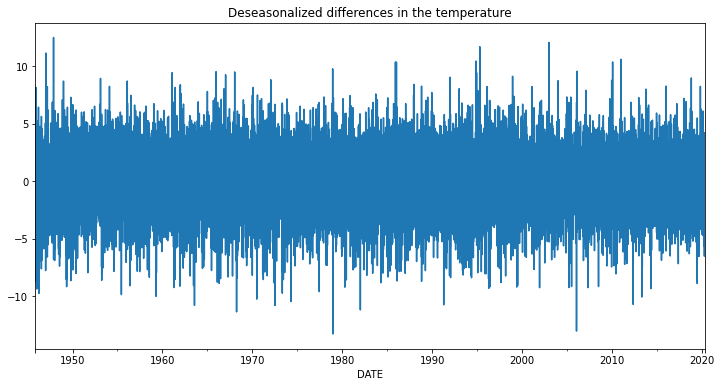

In [290]:
df['deseasonalized'].plot(figsize=(12,6), title='Deseasonalized differences in the temperature')

### Naive forecasting

In [291]:
df.reset_index()[-62:]

,DATE,SOUID,TG,Q_TG,difference,2nddifference,day_of_year,daily_mean,deseasonalized
27143,2020-02-29,111448,6.8,0,2.9,2.5,60,-0.001333,2.901333
27144,2020-03-01,111448,7.1,0,0.3,-2.6,61,-0.197333,0.497333
27145,2020-03-02,111448,5.9,0,-1.2,-1.5,62,0.188000,-1.388000
27146,2020-03-03,111448,4.8,0,-1.1,0.1,63,0.381333,-1.481333
27147,2020-03-04,111448,4.8,0,0.0,1.1,64,0.153333,-0.153333
...,...,...,...,...,...,...,...,...,...
27200,2020-04-26,111448,12.4,0,1.5,5.1,117,-0.513333,2.013333
27201,2020-04-27,111448,15.1,0,2.7,1.2,118,0.404000,2.296000
27202,2020-04-28,111448,17.0,0,1.9,-0.8,119,0.570667,1.329333
27203,2020-04-29,111448,12.0,0,-5.0,-6.9,120,0.349333,-5.349333


In [292]:
df.reset_index(inplace=True)

In [293]:
df.drop(df.index[845::1461])

,DATE,SOUID,TG,Q_TG,difference,2nddifference,day_of_year,daily_mean,deseasonalized
0,1945-11-06,127488,7.8,0,NaN,NaN,310,-0.266216,NaN
1,1945-11-07,127488,6.8,0,-1.0,NaN,311,-0.256000,-0.744000
2,1945-11-08,127488,6.4,0,-0.4,0.6,312,-0.165333,-0.234667
3,1945-11-09,127488,4.0,0,-2.4,-2.0,313,-0.308000,-2.092000
4,1945-11-10,127488,4.6,0,0.6,3.0,314,-0.376000,0.976000
...,...,...,...,...,...,...,...,...,...
27200,2020-04-26,111448,12.4,0,1.5,5.1,117,-0.513333,2.013333
27201,2020-04-27,111448,15.1,0,2.7,1.2,118,0.404000,2.296000
27202,2020-04-28,111448,17.0,0,1.9,-0.8,119,0.570667,1.329333
27203,2020-04-29,111448,12.0,0,-5.0,-6.9,120,0.349333,-5.349333


Train-test-split

In [294]:
xtrain = df.reset_index().index.tolist()[:-365]
xtest = df.reset_index().index.tolist()[-365:]
ytrain = df['deseasonalized'].tolist()[:-365]
ytrain[0] = 0
ytest = df['deseasonalized'].tolist()[-365:]

In [295]:
# remove February 29 from training data to make calculation of daily mean easier
# index 845 = 29.02.1948
# number of days between extra days = 1461
# index -62 = 29.02.2020
del ytrain[845::1461]
del xtrain[845::1461]
del ytest[-62]
del xtest[-62]

### 1. Forecast the last value seen

In [296]:
ypred_last = ytrain[-1:] * len(xtest)

### 2. Forecast the mean

In [297]:
mean = sum(ytrain) / len(ytrain)
ypred_mean = [mean] * len(xtest) 

### 3. Seasonal mean

In [298]:
ypred_sm = []
for i, j in enumerate(xtest):
    leap = i % 4
    day = i % 365
    daily_mean = sum(ytrain[day::365]) / len(ytrain[day::365])
    ypred_sm.append(daily_mean)

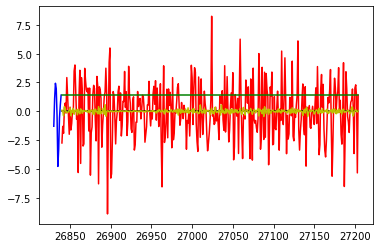

In [299]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(xtrain[-10:], ytrain[-10:], 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred_last, 'g-')
plt.plot(xtest, ypred_mean, 'k-')
plt.plot(xtest, ypred_sm, 'y-')

### Ridge Regression

In [ ]:
# think about pandas .is_leap_year to find a better solution for the problem

In [300]:
df365 = df.drop(df.index[845::1461])

In [301]:
df365['day_of_year'] = df365['DATE'].dt.dayofyear

In [302]:
xtrain = df365[['day_of_year']][:-365]
xtest = df365[['day_of_year']][-365:]
ytrain = df365['deseasonalized'][:-365]
ytrain[0] = 0
ytest = df365['deseasonalized'][-365:]

In [303]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain), model.score(xtest, ytest)

(2.440383994883888e-08, -5.994419415955576e-06)

In [304]:
ypred = model.predict(xtest)

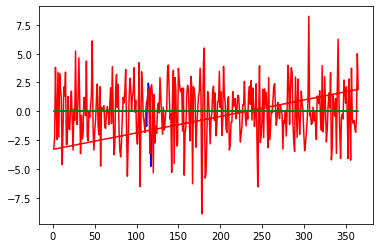

In [305]:
plt.plot(xtrain[-10:], ytrain[-10:], 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred, 'g-')